Con la sentencia ***import*** importamos cualquier librería (tener en cuenta que debe estar previamente instalada - **pip install *libería***)
Las librerías pueden o no usarse con alias, por ejemplo en nuestro código, estamos usando el alias *pd* para nombrar a la librería pandas. Esto no es necesario, no obstante pandas y numpy generalmente en la bibliografía y en los foros se las encontrarán de esta forma.
Luego estamos seteando pandas para que nos permita observar todas las columnas del dataset sin ocultar ninguna

In [91]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns 
sns.set()
import matplotlib
import matplotlib.pyplot as plt

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

Para poder trabajar sin problemas, lo primero que debemos hacer es setear el directorio de trabajo. De Con el comando *chdir* le estamos diciendo donde debe apuntar dicho directorio, con los **../** le estamos indicando que suba una carpeta

In [2]:
import os
os.chdir('../')
os.getcwd()

'C:\\Users\\Diego\\Documents\\proyectos\\diplomatura\\diplomatura'

#### Leo la base de datos, en este caso usamos la base del Covid
La leemos utilizando una librería más utilizada para el manejo de dataframes, se llama ***pandas***, esta librería
posee muchos métodos o funciones para poder leer muchos tipos o fuentes de datos. La documentación de la librería
la tienen en este [link](https://pandas.pydata.org/docs/reference/index.html)
En nuestro caso, estamos utilizando la función read_csv, utilizando el parámetro compression, esto nos permite abrir archivos que fueron comprimidos anteriormente con gzip.

In [3]:
covidNacion = pd.read_csv("./data/covid/covid19Nacion_20200813.csv.gz", compression="gzip")

Utilizamos la función head() para poder mostrar los primeros 5 registros. A la función le podemos pasar el número de filas que deseamos observar, *head(10)*, es decir, observaremos las primeras 10 filas. La función tail, nos realiza lo mismo, pero mostrándonos las últimas 5 filas. También podemos definir la cantidad de filas a mostrar pasándole el número.

In [4]:
covidNacion.head()

,id_evento_caso,sexo,edad,edad_años_meses,residencia_pais_nombre,residencia_provincia_nombre,residencia_departamento_nombre,carga_provincia_nombre,fecha_inicio_sintomas,fecha_apertura,sepi_apertura,fecha_internacion,cuidado_intensivo,fecha_cui_intensivo,fallecido,fecha_fallecimiento,asistencia_respiratoria_mecanica,carga_provincia_id,origen_financiamiento,clasificacion,clasificacion_resumen,residencia_provincia_id,fecha_diagnostico,residencia_departamento_id,ultima_actualizacion
0,1000000,M,53.0,Años,Argentina,CABA,SIN ESPECIFICAR,Buenos Aires,NaN,2020-06-01,23,NaN,NO,NaN,NO,NaN,NO,6,Privado,Caso Descartado,Descartado,2,2020-06-09,0,2020-08-13
1,1000002,M,21.0,Años,Argentina,Buenos Aires,La Matanza,Buenos Aires,NaN,2020-06-01,23,NaN,NO,NaN,NO,NaN,NO,6,Público,Caso Descartado,Descartado,6,2020-06-01,427,2020-08-13
2,1000003,F,40.0,Años,Argentina,Córdoba,Capital,Córdoba,2020-05-24,2020-06-01,23,NaN,NO,NaN,NO,NaN,NO,14,Privado,Caso Descartado,Descartado,14,2020-06-01,14,2020-08-13
3,1000005,F,58.0,Años,Argentina,Mendoza,Las Heras,Mendoza,NaN,2020-06-01,23,NaN,NO,NaN,NO,NaN,NO,50,Público,Caso Descartado,Descartado,50,2020-06-01,49,2020-08-13
4,1000006,M,28.0,Años,Argentina,Buenos Aires,Malvinas Argentinas,Buenos Aires,2020-05-30,2020-06-01,23,NaN,NO,NaN,NO,NaN,NO,6,Público,Caso sospechoso - Con muestra sin resultado,Sospechoso,6,NaN,515,2020-08-13


In [5]:
covidNacion.tail(10)

,id_evento_caso,sexo,edad,edad_años_meses,residencia_pais_nombre,residencia_provincia_nombre,residencia_departamento_nombre,carga_provincia_nombre,fecha_inicio_sintomas,fecha_apertura,sepi_apertura,fecha_internacion,cuidado_intensivo,fecha_cui_intensivo,fallecido,fecha_fallecimiento,asistencia_respiratoria_mecanica,carga_provincia_id,origen_financiamiento,clasificacion,clasificacion_resumen,residencia_provincia_id,fecha_diagnostico,residencia_departamento_id,ultima_actualizacion
894883,999988,M,37.0,Años,Argentina,Buenos Aires,SIN ESPECIFICAR,Buenos Aires,NaN,2020-06-01,23,NaN,NO,NaN,NO,NaN,NO,6,Privado,Caso Descartado,Descartado,6,2020-06-01,0,2020-08-13
894884,999989,M,50.0,Años,Argentina,Buenos Aires,Zárate,Buenos Aires,2020-05-23,2020-06-01,23,NaN,NO,NaN,NO,NaN,NO,6,Privado,Caso Descartado,Descartado,6,2020-05-30,882,2020-08-13
894885,999990,F,50.0,Años,Argentina,CABA,SIN ESPECIFICAR,CABA,2020-05-28,2020-06-01,23,2020-05-31,NO,NaN,NO,NaN,NO,2,Privado,Caso confirmado por laboratorio - No Activo po...,Confirmado,2,2020-06-01,0,2020-08-13
894886,999992,F,28.0,Años,Argentina,Santa Fe,Rosario,Santa Fe,NaN,2020-06-01,23,NaN,NO,NaN,NO,NaN,NO,82,Público,Caso Descartado,Descartado,82,2020-06-01,84,2020-08-13
894887,999993,F,37.0,Años,Argentina,Buenos Aires,Malvinas Argentinas,Buenos Aires,NaN,2020-06-01,23,NaN,NO,NaN,NO,NaN,NO,6,Privado,Caso confirmado - No activo (por tiempo de evo...,Confirmado,6,2020-06-13,515,2020-08-13
894888,999994,M,39.0,Años,Argentina,Tierra del Fuego,Río Grande,Tierra del Fuego,NaN,2020-06-01,23,NaN,NO,NaN,NO,NaN,NO,94,Público,Caso Descartado,Descartado,94,2020-06-01,7,2020-08-13
894889,999995,M,33.0,Años,Argentina,Formosa,Pilcomayo,Formosa,NaN,2020-06-01,23,NaN,NO,NaN,NO,NaN,NO,34,Público,Caso confirmado por laboratorio - No Activo po...,Confirmado,34,2020-06-12,49,2020-08-13
894890,999996,M,42.0,Años,Argentina,CABA,SIN ESPECIFICAR,CABA,NaN,2020-06-01,23,NaN,NO,NaN,NO,NaN,NO,2,Privado,Caso Descartado,Descartado,2,2020-06-01,0,2020-08-13
894891,999997,F,30.0,Años,Argentina,CABA,SIN ESPECIFICAR,Córdoba,NaN,2020-06-01,23,NaN,NO,NaN,NO,NaN,NO,14,Público,Caso Descartado,Descartado,2,2020-06-02,0,2020-08-13
894892,999999,F,57.0,Años,Argentina,Buenos Aires,General San Martín,Buenos Aires,2020-05-29,2020-06-01,23,NaN,NO,NaN,NO,NaN,NO,6,Público,Caso Descartado,Descartado,6,2020-06-02,371,2020-08-13


Vamos a ver la cantidad de filtas y columnas que posee la base de datos

In [6]:
covidNacion.shape

(894893, 25)

Para poder realizar una descripción estadística de la base (equivalente a summary de R) es la función *describe()*

In [7]:
covidNacion.describe()

,id_evento_caso,edad,sepi_apertura,carga_provincia_id,residencia_provincia_id,residencia_departamento_id
count,8.948930e+05,893770.000000,894893.000000,894893.000000,894893.000000,894893.000000
mean,1.347199e+06,39.381280,27.466574,14.039661,14.914719,263.129139
std,3.046589e+05,19.882959,4.789558,22.565954,23.004984,271.881231
min,6.720640e+05,0.000000,5.000000,2.000000,2.000000,0.000000
25%,1.093532e+06,26.000000,25.000000,2.000000,6.000000,14.000000
50%,1.352923e+06,37.000000,29.000000,6.000000,6.000000,134.000000
75%,1.610685e+06,51.000000,31.000000,6.000000,6.000000,441.000000
max,1.865337e+06,130.000000,44.000000,94.000000,99.000000,882.000000


Vamos a buscar valores faltantes de la siguiente forma:

In [8]:
covidNacion.isna().sum().sort_values(ascending=False)

fecha_fallecimiento                 886263
fecha_cui_intensivo                 878377
fecha_internacion                   779572
fecha_inicio_sintomas               361174
fecha_diagnostico                   101778
edad                                  1123
fecha_apertura                           1
ultima_actualizacion                     0
sexo                                     0
edad_años_meses                          0
residencia_pais_nombre                   0
residencia_provincia_nombre              0
residencia_departamento_nombre           0
carga_provincia_nombre                   0
cuidado_intensivo                        0
sepi_apertura                            0
residencia_departamento_id               0
fallecido                                0
asistencia_respiratoria_mecanica         0
carga_provincia_id                       0
origen_financiamiento                    0
clasificacion                            0
clasificacion_resumen                    0
residencia_

Veremos que valores posee el campo *edad_años_meses*. Para esto existen varias formas, la primera es agrupando por dicho campo y realizando una cuenta de registros (útil ya que podremos ver la frecuencia de la variable) también se podrá utilizar la función *drop_duplicates()* para que sólo nos aparezca una vez cada valor posible de variable

In [9]:
covidNacion.groupby("edad_años_meses").size()

edad_años_meses
Años     885138
Meses      9755
dtype: int64

Modificaremos en que aquellos casos que en el campo *edad_años_meses* figura meses por años = 0

In [10]:
covidNacion["edad"] = np.where(covidNacion["edad_años_meses"] == "Meses", 
                               0, 
                               covidNacion["edad"])

Validamos que se haya imputado correctamente

In [11]:
#la barra invertida sirve para poder continuar en el renglon de abajo (no debe haber
#ningún caracter luego de la barra, ni siquiera espacios)
covidNacion[covidNacion["edad_años_meses"] == "Meses"]\
        .agg({"edad":["min", "max", "sum"]})


,edad
min,0.0
max,0.0
sum,0.0


Trabajamos con el campo edad, tratamos de entender valores faltantes, outliers, etc

In [12]:
covidNacion.edad.isna().sum()

1123

In [13]:
covidNacion[covidNacion.edad.isna()].groupby("fallecido").size()

fallecido
NO    1112
SI      11
dtype: int64

Podemos observar que la variable edad tiene 1123 missings, de los cuales 1112 no fallecieron y 11 sí, por ende podríamos pensar en imputar dicha variable haciendo esta partición

In [14]:
covidNacion[(~covidNacion.edad.isna()) & (covidNacion.fallecido == "SI")]\
            .agg({"edad":["mean", "median"]})

,edad
mean,71.417914
median,74.000000


Podemos calcular automáticamente para los fallecidos y para los no

In [15]:
fallecido = ["NO", "SI"]
for x in fallecido:
    print("Fallecido {}".format(x))
    print(covidNacion[(~covidNacion.edad.isna()) & (covidNacion.fallecido == x)]\
            .agg({"edad":["mean", "median"]}))

Fallecido NO
             edad
mean    38.996057
median  37.000000
Fallecido SI
             edad
mean    71.417914
median  74.000000


Vamos a calcular la media y el desvío estándar de otra forma y así poder calcular el coeficiente de variación. El coeficiente de variación también puede ser calculado utilizando la librería scipy
Si el coeficiente es menor al 10% es, nos indica que prácticamente no hay variación, entre 10% y 25%, se los considera valores aceptables, más del 25% posee una gran dispersión

In [16]:
meanSi = covidNacion[(~covidNacion.edad.isna()) & (covidNacion.fallecido == "SI")].edad.mean()
stdSi = covidNacion[(~covidNacion.edad.isna()) & (covidNacion.fallecido == "SI")].edad.std()
cvSi = stdSi / meanSi 
cvSi

0.23934208386056388

In [17]:
meanNo = covidNacion[(~covidNacion.edad.isna()) & (covidNacion.fallecido == "NO")].edad.mean()
stdNo = covidNacion[(~covidNacion.edad.isna()) & (covidNacion.fallecido == "NO")].edad.std()
cvNo = stdNo / meanNo
cvNo

0.5073038462439642

Podemos considerar que en el primer caso la dispersión puede ser aceptable, en el segundo caso hay gran dispersión. La edad en el segundo caso (aquellos no fallecidos) vamos a abrirlo en los casos con internación y sin internación

In [18]:
meanNoInternado = covidNacion[(~covidNacion.fecha_internacion.isna()) & (covidNacion.fallecido == "NO")].edad.mean()
stdNoInternado = covidNacion[(~covidNacion.fecha_internacion.isna()) & (covidNacion.fallecido == "NO")].edad.std()
cvNoInternado = stdNoInternado / meanNoInternado
cvNoInternado

0.5392090345262082

Ahora calculamos la media recortada de la edad para este colectivo

In [19]:
cota = int(covidNacion[(~covidNacion.edad.isna()) & (covidNacion.fallecido == "NO")].shape[0] * 0.05)
cota

44257

In [20]:
edadArray = covidNacion[(~covidNacion.edad.isna()) & 
                        (covidNacion.fallecido == "NO")].sort_values(by="edad").edad.values
mediaRecortadaEdad = edadArray[44257:-44257].mean()
stdRecordadaEdad = edadArray[44257:-44257].std()
cvRecortadaEdad =  stdRecordadaEdad / mediaRecortadaEdad
cvRecortadaEdad

0.3997460575264116

Decidimos imputar por la mediana de las edades

In [21]:
fallecido = ["NO", "SI"]
for x in fallecido:
    median = covidNacion[(~covidNacion.edad.isna()) & (covidNacion.fallecido == x)].edad.median()
    covidNacion["edad"] = np.where ((covidNacion.edad.isna()) & (covidNacion.fallecido == x), 
                                    median, 
                                    covidNacion.edad) 
    

In [22]:
covidNacion.edad.isna().sum()

0

Revisamos los posibles valores de la variable **clasificacion_resumen**

In [23]:
covidNacion.groupby("clasificacion_resumen").size()

clasificacion_resumen
Confirmado        276055
Descartado        522915
Sin Clasificar        15
Sospechoso         95908
dtype: int64

Vamos a calcular el ratio de contagio versus los descartados segun provincia

In [24]:
covidNacion["confirmado"] = np.where(covidNacion.clasificacion_resumen == "Confirmado", 1, 0)
covidNacion["descartado"] = np.where(covidNacion.clasificacion_resumen == "Descartado", 1, 0)


In [25]:
sumarizada = covidNacion.groupby("residencia_provincia_nombre").agg({"confirmado":["sum"], "descartado":["sum"]})\
            .reset_index()
sumarizada.columns = ["residencia_provincia_nombre", "confirmado", "descartado"]
sumarizada["ratio"] = sumarizada["confirmado"] / sumarizada["descartado"]
sumarizada

,residencia_provincia_nombre,confirmado,descartado,ratio
0,Buenos Aires,170546,248957,0.685042
1,CABA,74017,109748,0.674427
2,Catamarca,62,2305,0.026898
3,Chaco,4279,22330,0.191626
4,Chubut,383,3218,0.119018
5,Corrientes,222,4988,0.044507
6,Córdoba,4145,34447,0.120330
7,Entre Ríos,1365,5114,0.266914
8,Formosa,78,890,0.087640
9,Jujuy,4204,9592,0.438282


Vamos a unir la tabla sumarizada con la base original para poder agregar el campo ratio al análisis

In [26]:
covidNacion = pd.merge(covidNacion, sumarizada[["residencia_provincia_nombre", "ratio"]], 
         how = "inner", on="residencia_provincia_nombre")

Vamos a cambiar el nombre del campo ratio, por uno un poco mas representativo

In [27]:
covidNacion = covidNacion.rename(columns = {"ratio": "ratioPositivoVsDescartado"})

Modificaremos las columnas *cuidado_intensivo, fallecido, asistencia_respiratoria_mecanica* para que sea mas facil el manejo de la información (cambiaremos SI por 1 y NO por 0

In [28]:
variables = ["cuidado_intensivo", "fallecido", "asistencia_respiratoria_mecanica"]
for variable in variables:
    covidNacion[variable] = np.where(covidNacion[variable] == "SI", 1, 0)

In [29]:
covidNacion.cuidado_intensivo.drop_duplicates()

0     0
29    1
Name: cuidado_intensivo, dtype: int32

Generaremos la variable sospechoso

In [30]:
covidNacion["sospechoso"] = np.where(covidNacion.clasificacion_resumen == "Sospechoso", 1, 0)

Con las variables *confirmado, descartado y sospechoso* creamos una especie de one hot encoding. Lo hicimos manualmente. Ahora lo haremos utilizando una función en scikit-learn

In [31]:
#handle_unknown es un atributo muy interesante a la hora de implementar, porque si 
#se agrega algun valor al campo que aplicamos oneHotEncoder, no nos daria error, sino que igual ejecutaria
enc = OneHotEncoder(handle_unknown='ignore')


In [32]:
#Entreno al oneHotEncoder
enc.fit(covidNacion[["clasificacion_resumen"]])

OneHotEncoder(handle_unknown='ignore')

In [33]:
#Uno la matriz del oneHotEncoder a la base original
covidNacion = covidNacion.join(pd.DataFrame(enc.transform(covidNacion[["clasificacion_resumen"]])\
.toarray(),
columns=list(enc.categories_[0])))

Como ya habiamos creado dos variables con los valores confirmado y descartado, ahora las borro para que quede prolijo el dataset

In [34]:
covidNacion = covidNacion.drop(columns=["sospechoso", "confirmado"])

Empezaremos con los análisis visuales

In [35]:
#La funcion groupby se utiliza para hacer agrupadores, tener en cuenta que todos los campos que se agregan al
#groupby seran los indices de la nueva Serie / dataframe. Si hay mas de un campo dentro del group by se debera 
#pasar en forma de lista, es decir, ["campo_1", "campo_2"]
testeos = covidNacion.groupby("sepi_apertura").size().to_frame("#Testeos")
confirmados = covidNacion[covidNacion.Confirmado == 1].groupby("sepi_apertura").size().to_frame("#Confirmados")
descartados = covidNacion[covidNacion.Descartado == 0].groupby("sepi_apertura").size().to_frame("#Descartados")
dataAgrupada = testeos.join(confirmados)
dataAgrupada = dataAgrupada.join(descartados)
dataAgrupada.isna().sum()

#Testeos        0
#Confirmados    6
#Descartados    5
dtype: int64

Vamos a convertir todos los valoes nulos o missings en 0

In [36]:
#Tener en cuenta que la funcion fillna puede ser utilizada para todo el dataframe o solamente para una variable
#si es solo para una variable hay que imputar solo dicha variable
dataAgrupada = dataAgrupada.fillna(0)
dataAgrupada.isna().sum()

#Testeos        0
#Confirmados    0
#Descartados    0
dtype: int64

In [37]:
#Tener en cuenta que para que tenga coherencia el cumsum, la base debe estar ordenada segun 
dataAgrupada["# testeos Acumulados"] = dataAgrupada["#Testeos"].cumsum()
dataAgrupada["# confirmados Acumulados"] = dataAgrupada["#Confirmados"].cumsum()
dataAgrupada["# descartados Acumulados"] = dataAgrupada["#Descartados"].cumsum()

In [38]:
dataAgrupada

,#Testeos,#Confirmados,#Descartados,# testeos Acumulados,# confirmados Acumulados,# descartados Acumulados
sepi_apertura,,,,,,
5,5,0.0,0.0,5,0.0,0.0
6,3,0.0,0.0,8,0.0,0.0
7,1,0.0,0.0,9,0.0,0.0
8,1,0.0,0.0,10,0.0,0.0
9,27,0.0,1.0,37,0.0,1.0
10,90,15.0,20.0,127,15.0,21.0
11,679,83.0,117.0,806,98.0,138.0
12,1567,317.0,370.0,2373,415.0,508.0
13,3712,676.0,774.0,6085,1091.0,1282.0


Vamos a ver las curvas acumuladas de testeos y de confirmados, para esto, vamos a utilizar la librería seaborn
(existen varias librerías, hasta pandas tiene funciones de visualización - por detrás usa matplotlib) 
Considero que seaborn es simple, intuitiva y posee interesantes features. Si quieren pueden revisar plotly como alternativa a seaborn

Para visualizar un gráfico de líneas se usa la función lineplot les dejo el [link](https://seaborn.pydata.org/generated/seaborn.lineplot.html) de la documentación

<AxesSubplot:xlabel='sepi_apertura'>

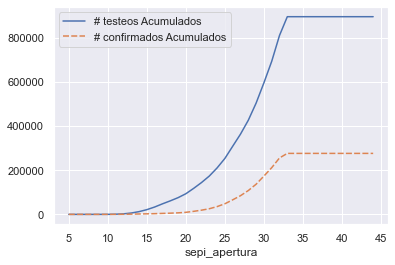

In [39]:
sns.lineplot(data=dataAgrupada[["# testeos Acumulados", "# confirmados Acumulados"]])

Ahora usaremos un gráfico de barras para ver la cantidad de casos positivos por provincia, lo mismo para visualizar la cantidad de testeos. Les dejo la documentación de la función barplot() en el siguiente [link](http://seaborn.pydata.org/generated/seaborn.barplot.html#seaborn.barplot)

In [40]:
sumaProvincia = covidNacion.groupby("residencia_provincia_nombre")\
                        .agg({"id_evento_caso":["count"], "Confirmado":["sum"]})\
                        .reset_index()
sumaProvincia.columns = ["Provincia", "# Testeos", "# Confirmados"]
sumaProvincia

,Provincia,# Testeos,# Confirmados
0,Buenos Aires,485652,170546.0
1,CABA,198655,74017.0
2,Catamarca,2392,62.0
3,Chaco,27968,4279.0
4,Chubut,4001,383.0
5,Corrientes,5477,222.0
6,Córdoba,40025,4145.0
7,Entre Ríos,6918,1365.0
8,Formosa,1018,78.0
9,Jujuy,18075,4204.0


[Text(0, 0, 'Buenos Aires'),
 Text(1, 0, 'CABA'),
 Text(2, 0, 'Córdoba'),
 Text(3, 0, 'Chaco'),
 Text(4, 0, 'Santa Fe'),
 Text(5, 0, 'Jujuy'),
 Text(6, 0, 'Tucumán'),
 Text(7, 0, 'Mendoza'),
 Text(8, 0, 'Río Negro'),
 Text(9, 0, 'Entre Ríos'),
 Text(10, 0, 'Santiago del Estero'),
 Text(11, 0, 'Neuquén'),
 Text(12, 0, 'Corrientes'),
 Text(13, 0, 'La Rioja'),
 Text(14, 0, 'Tierra del Fuego'),
 Text(15, 0, 'Chubut'),
 Text(16, 0, 'SIN ESPECIFICAR'),
 Text(17, 0, 'Salta'),
 Text(18, 0, 'Santa Cruz'),
 Text(19, 0, 'Misiones'),
 Text(20, 0, 'Catamarca'),
 Text(21, 0, 'La Pampa'),
 Text(22, 0, 'San Juan'),
 Text(23, 0, 'Formosa'),
 Text(24, 0, 'San Luis')]

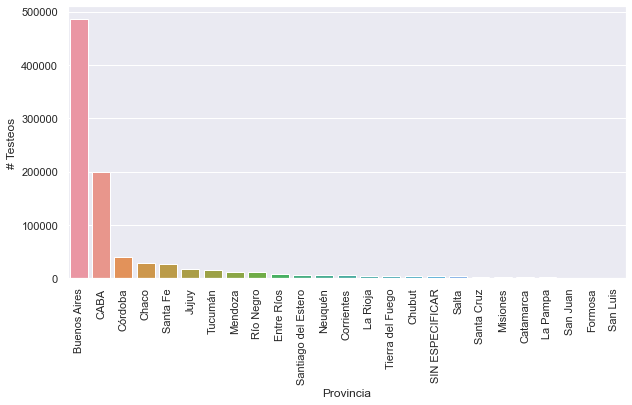

In [41]:
plt.figure(figsize=(10,5))
chart = sns.barplot(x="Provincia", y="# Testeos", 
                    data=sumaProvincia.sort_values(by="# Testeos", ascending = False))

chart.set_xticklabels(chart.get_xticklabels(), rotation=90)



Creamos un campo que sea el ratio entre los positivos y los testeos totales para ver como viene cada una de las provincias

In [42]:
sumaProvincia["Confirmados / Totales"] = sumaProvincia["# Confirmados"] / sumaProvincia["# Testeos"]

[Text(0, 0, 'SIN ESPECIFICAR'),
 Text(1, 0, 'CABA'),
 Text(2, 0, 'Buenos Aires'),
 Text(3, 0, 'Santa Cruz'),
 Text(4, 0, 'Río Negro'),
 Text(5, 0, 'Neuquén'),
 Text(6, 0, 'Tierra del Fuego'),
 Text(7, 0, 'Salta'),
 Text(8, 0, 'Mendoza'),
 Text(9, 0, 'Jujuy'),
 Text(10, 0, 'Entre Ríos'),
 Text(11, 0, 'Chaco'),
 Text(12, 0, 'La Rioja'),
 Text(13, 0, 'Córdoba'),
 Text(14, 0, 'Santa Fe'),
 Text(15, 0, 'Chubut'),
 Text(16, 0, 'La Pampa'),
 Text(17, 0, 'Formosa'),
 Text(18, 0, 'Corrientes'),
 Text(19, 0, 'San Luis'),
 Text(20, 0, 'Tucumán'),
 Text(21, 0, 'Santiago del Estero'),
 Text(22, 0, 'Catamarca'),
 Text(23, 0, 'Misiones'),
 Text(24, 0, 'San Juan')]

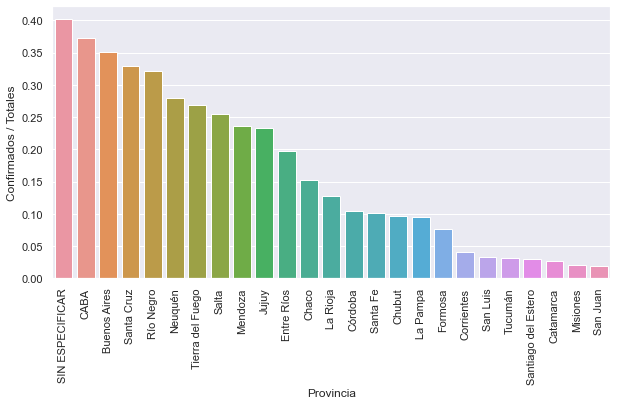

In [43]:
plt.figure(figsize=(10,5))
chart = sns.barplot(x="Provincia", y="Confirmados / Totales", 
                    data=sumaProvincia.sort_values(by="Confirmados / Totales", ascending = False))

chart.set_xticklabels(chart.get_xticklabels(), rotation=90)



Observamos que Capital Federal tiene la mayor tasa de positivos sobre total de testeos, siendo la segunda provincia que testea (esta ultima afirmación no es representativa ya que la densidad de población que existe en Capital Federal es mucho mayor que otras provincias)
Vamos a comenzar a revisar Capital Federal y sus contagios

Compararemos la base de **Nación** versus la base de la **Ciudad**

In [44]:
covidCaba = covidNacion[covidNacion.residencia_provincia_nombre == "CABA"]
covidCaba.shape

(198655, 31)

In [45]:
print("Podemos observar que tenemos {} Casos confirmados para CABA en la base de la Nacion".\
      format(int(covidCaba.Confirmado.sum())))

Podemos observar que tenemos 74017 Casos confirmados para CABA en la base de la Nacion


In [46]:
covidCabaIndependiente = pd.read_csv("./data/covid/covid19Ciudad_20200813.csv.gz", compression="gzip")

In [47]:
covidCabaIndependiente = covidCabaIndependiente[covidCabaIndependiente.provincia == "CABA"]
covidCabaIndependiente.shape

(185923, 14)

In [48]:
covidCabaIndependiente.head()

,numero_de_caso,fecha_apertura_snvs,fecha_toma_muestra,fecha_clasificacion,provincia,barrio,comuna,genero,edad,clasificacion,fecha_fallecimiento,fallecido,fecha_alta,tipo_contagio
1,1169074,25JUN2020:00:00:00.000000,25JUN2020:00:00:00.000000,27JUN2020:00:00:00.000000,CABA,PARQUE PATRICIOS,4.0,femenino,38.0,confirmado,NaN,NaN,NaN,Trabajador de la Salud
2,1169619,25JUN2020:00:00:00.000000,24JUN2020:00:00:00.000000,27JUN2020:00:00:00.000000,CABA,NUÑEZ,13.0,femenino,38.0,confirmado,NaN,NaN,NaN,Comunitario
3,1155493,24JUN2020:00:00:00.000000,24JUN2020:00:00:00.000000,26JUN2020:00:00:00.000000,CABA,VILLA GRAL. MITRE,11.0,masculino,61.0,confirmado,NaN,NaN,NaN,Comunitario
4,1060870,11JUN2020:00:00:00.000000,09JUN2020:00:00:00.000000,11JUN2020:00:00:00.000000,CABA,MATADEROS,9.0,femenino,37.0,confirmado,NaN,NaN,NaN,Comunitario
6,1156125,24JUN2020:00:00:00.000000,23JUN2020:00:00:00.000000,25JUN2020:00:00:00.000000,CABA,BARRACAS,4.0,masculino,49.0,confirmado,NaN,NaN,NaN,En Investigación


In [49]:
covidCabaIndependiente.isna().sum().sort_values(ascending = False)

fallecido              183660
fecha_fallecimiento    183660
fecha_alta             156870
tipo_contagio          112717
fecha_toma_muestra       7087
comuna                   6047
barrio                   6047
edad                      200
genero                      3
fecha_clasificacion         1
clasificacion               0
provincia                   0
fecha_apertura_snvs         0
numero_de_caso              0
dtype: int64

In [50]:
covidCabaIndependiente.groupby("clasificacion").size().sort_values(ascending = False)

clasificacion
descartado    100831
confirmado     73515
sospechoso     11577
dtype: int64

Vemos que en esta base tenemos una diferencia de aproximadamente mil casos confirmados con respecto a la base de la Nacion, esto equivale aproximadamente 0,5 % de la base

In [51]:
covidCabaIndependiente["comuna"] = np.where(covidCabaIndependiente.comuna.isna(), 0, covidCabaIndependiente.comuna) 

In [52]:
covidCabaIndependiente["comuna"] = covidCabaIndependiente["comuna"].astype(int)

In [53]:
agrupadoComuna = covidCabaIndependiente[(covidCabaIndependiente.clasificacion == "confirmado") & 
                                        (covidCabaIndependiente.comuna != 0)]\
                .groupby("comuna").size().to_frame("# Confirmados")
agrupadoComuna["% Confirmados"] = agrupadoComuna ["# Confirmados"] / agrupadoComuna["# Confirmados"].sum()
agrupadoComuna = agrupadoComuna.sort_values(by = "% Confirmados", ascending = False)
agrupadoComuna

,# Confirmados,% Confirmados
comuna,,
4,9920,0.138575
8,8981,0.125457
1,7967,0.111293
7,7876,0.110022
3,6171,0.086204
5,3772,0.052692
15,3637,0.050806
9,3590,0.050149
14,3588,0.050122


A continuación armaremos un gráfico de torta con los porcentajes de positivos por comuna, para poder conocer qué comuna tiene más incidencia en la pandemia. En el gráfico expanderemos la primera comuna ya que es la que mayor contagios tiene, para eso usamos la variable explode. Este tipo de gráfico no se encuentra en seaborn, por tal motivo lo graficamos directamente desde matplotlib.
La documentación la pueden encontrar en el siguiente [link](https://matplotlib.org/3.1.1/gallery/index.html)

explode = [0 for x in agrupadoComuna.index[1:]]
explode.insert(0,0.1)
fig1, ax1 = plt.subplots()
ax1.pie(agrupadoComuna["% Confirmados"].values, explode=explode, 
        labels=list(agrupadoComuna.index), autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
fig1.suptitle("Positivos por Comuna")


In [54]:
#Completamos los missings de edad con la mediana
medianaEdad = covidCabaIndependiente[~covidCabaIndependiente.edad.isna()].edad.median()
covidCabaIndependiente["edad"] = np.where(covidCabaIndependiente.edad.isna(), medianaEdad, 
                                          covidCabaIndependiente.edad)

In [55]:
covidCabaIndependiente.edad.isna().sum()

0

Vamos a transformar la edad en una variable con menos valores, dividiendola en cuartiles

In [56]:
covidCabaIndependiente["cuartiles"] = pd.qcut(covidCabaIndependiente.edad, 4, labels=False)

In [57]:
covidCabaIndependiente.groupby("cuartiles").size()

cuartiles
0    49752
1    44327
2    45508
3    46336
dtype: int64

In [58]:
covidCabaIndependiente.groupby(["cuartiles", "clasificacion"]).size()

cuartiles  clasificacion
0          confirmado       19431
           descartado       27621
           sospechoso        2700
1          confirmado       17607
           descartado       23687
           sospechoso        3033
2          confirmado       18410
           descartado       24000
           sospechoso        3098
3          confirmado       18067
           descartado       25523
           sospechoso        2746
dtype: int64

Voy a ver valores atípicos utilizando el gráfico de boxplot (o gráfico de bigotes). Para dicho gráfico utilizamos seaborn, la documentación la podemos encontrar en el siguiente [link](https://seaborn.pydata.org/examples/grouped_boxplot.html)

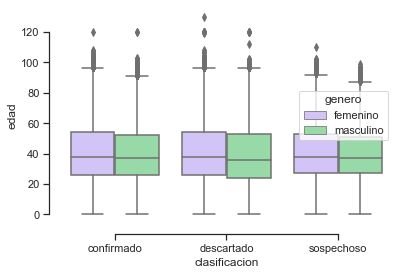

In [59]:
sns.set(style="ticks", palette="pastel")

# Load the example tips dataset

# Draw a nested boxplot to show bills by day and time
sns.boxplot(x="clasificacion", y="edad",
            hue="genero", palette=["m", "g"],
            data=covidCabaIndependiente)
sns.despine(offset=10, trim=True)

Vamos a traer información del senso realizado en el 2010, en donde vamos a tener información por Comuna. Con esta información vamos a crear una variable que será la salida de un modelo de clustering, para que podamos así agrupar las comunas y esta agrupación usarla como una nueva variable. Pero antes de correr un Kmeans, utilizaremos componentes principales para que sólo queden dos variables y que podamos graficarlo y que sea mas entendible

In [68]:
df = pd.read_excel('./data/covid/variablesCenso2010.xlsx')

In [74]:
df = df[df.Departamento.str.contains("COMUNA")]

In [77]:
df.head()

,Código,Provincia,Departamento,Poblacion,Hogares,Pershog,serv_satis,viv_satis,viv_pisos,sin_nbi,baño,baño_exc,viv_due,te_fijo,te_movil,pc,usa_pc,tasa_act,Tasa_emp,ind_envej,pob_ma40,pob_me14,Prim_comp,Sec_comp,Terc_comp,Univ_comp,Prim_inc,Sec_inc,Terc_inc,Univ_inc
0,2001,AMBA,COMUNA 01,205886,85079,2.419939,94.945125,75.469627,89.90,83.50,96.82,84.58,41.31,70.77,86.34,60.53,62.11,74.98,71.58,91.78,42.30,15.41,11.317949,19.912373,6.121186,17.339655,11.443357,15.697179,3.498198,14.670103
1,2002,AMBA,COMUNA 02,157932,73325,2.153863,99.173122,91.889260,98.96,97.73,99.42,97.78,53.73,93.70,88.99,79.10,77.54,72.14,69.43,179.66,47.82,11.02,5.508304,15.159239,7.807008,30.083040,6.436640,8.576373,3.189477,23.239918
2,2003,AMBA,COMUNA 03,187537,80764,2.322037,98.137689,85.602804,97.69,87.82,98.40,89.06,44.51,79.49,85.51,63.93,68.51,74.36,71.17,106.85,44.73,14.98,11.966936,22.111663,6.651438,12.915246,10.530050,15.973027,4.275471,15.576168
3,2004,AMBA,COMUNA 04,218245,76562,2.850566,94.817738,72.865959,88.80,87.22,98.15,88.81,53.15,70.53,85.72,55.07,61.10,71.41,67.52,61.47,39.68,20.96,17.329751,21.002850,4.776254,6.711372,16.991655,21.573324,3.067384,8.547410
4,2005,AMBA,COMUNA 05,179005,76999,2.324770,98.682162,88.364788,98.06,93.76,99.07,94.32,52.24,86.73,87.14,70.40,72.73,74.22,71.26,118.64,46.95,14.50,10.381125,20.420207,7.774252,16.301841,9.657295,14.620531,4.441139,16.403611


In [78]:
features = [ 'serv_satis', 'viv_satis', 'viv_pisos', 'sin_nbi', 'baño',
       'baño_exc', 'viv_due', 'te_fijo', 'te_movil', 'pc', 'usa_pc',
       'tasa_act', 'Tasa_emp', 'ind_envej', 'pob_ma40', 'pob_me14',
       'Prim_comp', 'Sec_comp', 'Terc_comp', 'Univ_comp', 'Prim_inc',
       'Sec_inc', 'Terc_inc', 'Univ_inc']

#Vamos a estadarizar todas las variables que utilizaremos para el análisis de componentes principales
x = df.loc[:, features].values
x = StandardScaler().fit_transform(x)


In [83]:
#Inicializamos el analisis de componentes principales
pca = PCA(n_components=2)
#Entrenamos
principalComponents = pca.fit_transform(x)
#Creamos un dataFrame con las dos variables que decidimos tener
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
principalDf = df.join(principalDf)[["Departamento", 'principal component 1', 'principal component 2']]
principalDf

,Departamento,principal component 1,principal component 2
0,COMUNA 01,2.951678,4.913658
1,COMUNA 02,-5.101035,1.054968
2,COMUNA 03,0.540118,2.176607
3,COMUNA 04,5.845089,0.744924
4,COMUNA 05,-1.804325,0.797821
5,COMUNA 06,-3.631410,-0.547597
6,COMUNA 07,2.388435,-0.303650
7,COMUNA 08,10.227504,-0.547310
8,COMUNA 09,3.011464,-3.086458
9,COMUNA 10,-0.081502,-2.580965


In [84]:
#con esta sentencia nos permite saber cuanto explica cada uno de las dos componentes. En este caso entre ambas 
#componentes nos explica mas del 87 % de la base original
pca.explained_variance_ratio_

array([0.71728371, 0.16267719])

In [89]:
#Creo la matriz para poder introducirla en el kmeans
X = np.array(principalDf[["principal component 1","principal component 2"]])

#Inicializo y entro un kmeans con 4 agrupadores (es decir, tendre 4 centroides)
kmeans = KMeans(n_clusters=4).fit(X)
labels = kmeans.predict(X)
# Obtengo los 4 centroides
C = kmeans.cluster_centers_

In [94]:
X[:, 0]

array([ 2.95167834, -5.10103547,  0.54011781,  5.84508863, -1.80432466,
       -3.63141027,  2.38843499, 10.22750393,  3.01146404, -0.08150216,
       -1.36744837, -2.22444078, -4.57517055, -4.87380567, -1.3051498 ])

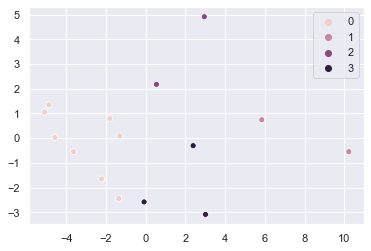

In [96]:
ax = sns.scatterplot(x=X[:, 0], y=X[:, 1],
                     hue=labels)

In [102]:
cabaClustering = pd.DataFrame(labels, columns = ["label"]).join(principalDf)[["Departamento", "label"]]
cabaClustering.sort_values(by="label")

,Departamento,label
1,COMUNA 02,0
4,COMUNA 05,0
5,COMUNA 06,0
10,COMUNA 11,0
11,COMUNA 12,0
12,COMUNA 13,0
13,COMUNA 14,0
14,COMUNA 15,0
3,COMUNA 04,1
7,COMUNA 08,1


<img src="./imagenes/comunas.jpg"
     alt="Markdown Monster icon"
     style="float: left; margin-right: 10px;width: 50%; height: 50%"/>

In [111]:
def crearDepartamento(comuna):
    return "COMUNA "+("00"+str(comuna))[-2:]
#La funcion apply te permite aplicar una funcion definida por el usuario a todo el dataframe, en este caso uso 
#como input el campo comuna
covidCabaIndependiente["Departamento"] = covidCabaIndependiente.apply(lambda x: crearDepartamento(x.comuna), 
                                                                      axis = 1)

In [125]:
covidCabaIndependiente = pd.merge(covidCabaIndependiente, cabaClustering, how="left", on="Departamento")
#Los registros que tenian en nulo la comuna y el barrio, no tendran informacion de este cluster

,numero_de_caso,fecha_apertura_snvs,fecha_toma_muestra,fecha_clasificacion,provincia,barrio,comuna,genero,edad,clasificacion,fecha_fallecimiento,fallecido,fecha_alta,tipo_contagio,cuartiles,Departamento,confirmado,descartado,sospechoso,label
0,1169074,25JUN2020:00:00:00.000000,25JUN2020:00:00:00.000000,27JUN2020:00:00:00.000000,CABA,PARQUE PATRICIOS,4,femenino,38.0,confirmado,NaN,NaN,NaN,Trabajador de la Salud,2,COMUNA 04,1,0,0,1.0
1,1169619,25JUN2020:00:00:00.000000,24JUN2020:00:00:00.000000,27JUN2020:00:00:00.000000,CABA,NUÑEZ,13,femenino,38.0,confirmado,NaN,NaN,NaN,Comunitario,2,COMUNA 13,1,0,0,0.0
2,1155493,24JUN2020:00:00:00.000000,24JUN2020:00:00:00.000000,26JUN2020:00:00:00.000000,CABA,VILLA GRAL. MITRE,11,masculino,61.0,confirmado,NaN,NaN,NaN,Comunitario,3,COMUNA 11,1,0,0,0.0
3,1060870,11JUN2020:00:00:00.000000,09JUN2020:00:00:00.000000,11JUN2020:00:00:00.000000,CABA,MATADEROS,9,femenino,37.0,confirmado,NaN,NaN,NaN,Comunitario,1,COMUNA 09,1,0,0,3.0
4,1156125,24JUN2020:00:00:00.000000,23JUN2020:00:00:00.000000,25JUN2020:00:00:00.000000,CABA,BARRACAS,4,masculino,49.0,confirmado,NaN,NaN,NaN,En Investigación,2,COMUNA 04,1,0,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
185918,1267313,06JUL2020:00:00:00.000000,06JUL2020:00:00:00.000000,06JUL2020:00:00:00.000000,CABA,CABALLITO,6,masculino,25.0,descartado,NaN,NaN,NaN,NaN,0,COMUNA 06,0,1,0,0.0
185919,1643098,02AUG2020:00:00:00.000000,02AUG2020:00:00:00.000000,03AUG2020:00:00:00.000000,CABA,PALERMO,14,femenino,82.0,descartado,NaN,NaN,NaN,NaN,3,COMUNA 14,0,1,0,0.0
185920,1195187,28JUN2020:00:00:00.000000,28JUN2020:00:00:00.000000,28JUN2020:00:00:00.000000,CABA,VILLA LUGANO,8,masculino,7.0,descartado,NaN,NaN,NaN,NaN,0,COMUNA 08,0,1,0,1.0
185921,1193549,28JUN2020:00:00:00.000000,28JUN2020:00:00:00.000000,29JUN2020:00:00:00.000000,CABA,SAN TELMO,1,masculino,31.0,descartado,NaN,NaN,NaN,NaN,1,COMUNA 01,0,1,0,2.0


In [126]:
#Otra forma de crear variables oneHotEncoders o dummies es utilizando la funcion get_dummies de Pandas
covidCabaIndependiente = covidCabaIndependiente.join(pd.get_dummies(covidCabaIndependiente["clasificacion"]))

ValueError: columns overlap but no suffix specified: Index(['confirmado', 'descartado', 'sospechoso'], dtype='object')

In [127]:
covidCabaIndependiente.columns

Index(['numero_de_caso', 'fecha_apertura_snvs', 'fecha_toma_muestra',
       'fecha_clasificacion', 'provincia', 'barrio', 'comuna', 'genero',
       'edad', 'clasificacion', 'fecha_fallecimiento', 'fallecido',
       'fecha_alta', 'tipo_contagio', 'cuartiles', 'Departamento',
       'confirmado', 'descartado', 'sospechoso', 'label'],
      dtype='object')

In [131]:
agrupadoLabel = covidCabaIndependiente.groupby("label")\
                                    .agg({"confirmado":["sum"], "descartado":["sum"]})\
                                    .reset_index()
agrupadoLabel.columns = ["cluster", "confirmados", "descartados"]

In [138]:
agrupadoLabel["Confirmados / Descartados"] = agrupadoLabel["confirmados"] / agrupadoLabel["descartados"]
agrupadoLabel = agrupadoLabel.sort_values(by="Confirmados / Descartados", ascending=False)

<AxesSubplot:xlabel='cluster', ylabel='Confirmados / Descartados'>

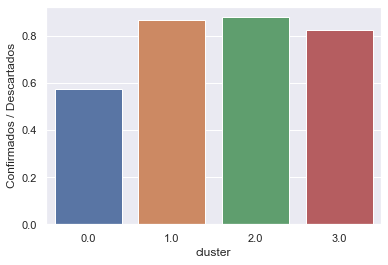

In [139]:
sns.barplot(x="cluster", y="Confirmados / Descartados", 
                    data=agrupadoLabel)
